In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

图像平滑

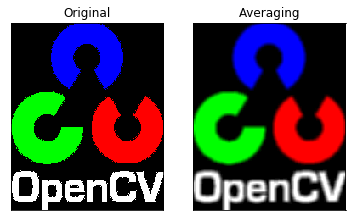

In [2]:
img = cv2.imread('logo.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

1 平均

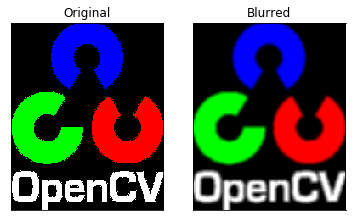

In [6]:
img = cv2.imread('logo.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2 高斯模糊

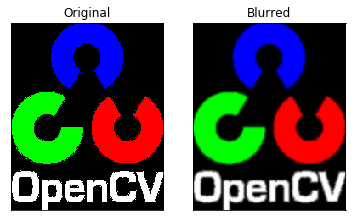

In [8]:
img = cv2.imread('logo.png')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

3 中值模糊

In [13]:
#给图像添加椒盐噪声
def SaltAndPepper(src,percetage):
    NoiseImg=src
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        randX=np.random.random_integers(0,src.shape[0]-1)
        randY=np.random.random_integers(0,src.shape[1]-1)
        if np.random.random_integers(0,1)==0:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg 

c:\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 221 + 1) instead
  """
c:\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 179 + 1) instead
  
c:\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  import sys


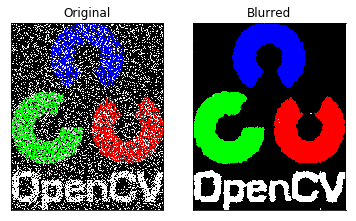

In [15]:
img = cv2.imread('logo.png')
img=SaltAndPepper(img,0.5)

blur = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


4 双边滤波

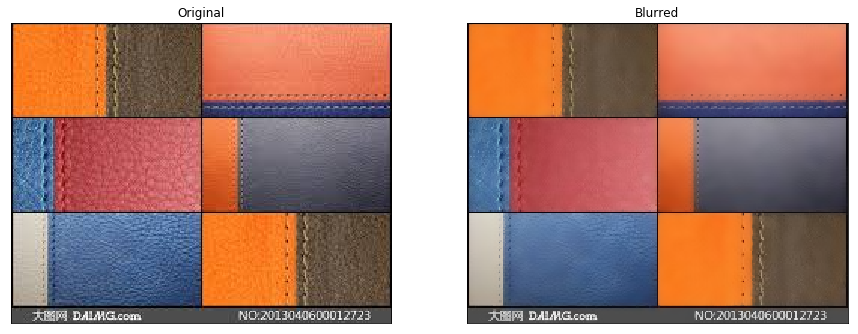

In [22]:
img = cv2.imread('texture.jpg')

blur = cv2.bilateralFilter(img,9,75,75)

plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur[:,:,::-1]),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

形态学转换

1 腐蚀

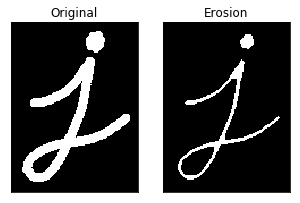

In [36]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap='gray'),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

2 膨胀

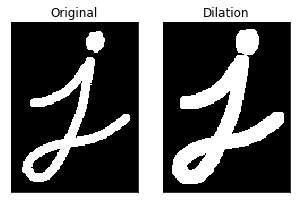

In [37]:
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap='gray'),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()

3 开运算

c:\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  """
c:\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 111 + 1) instead
  
c:\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  import sys


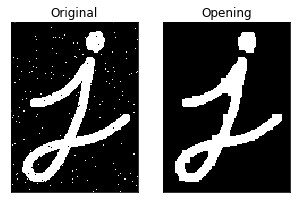

In [46]:
img = cv2.imread('j.png',0)
img=SaltAndPepper(img,0.02)

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap='gray'),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

4 闭运算

c:\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  """
c:\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 111 + 1) instead
  
c:\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  import sys


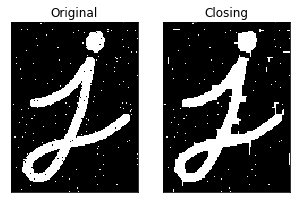

In [44]:
img = cv2.imread('j.png',0)
img=SaltAndPepper(img,0.02)

kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap='gray'),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

5 形态学梯度

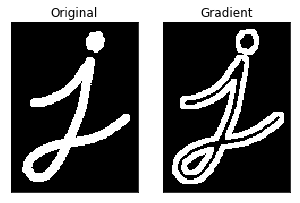

In [45]:
img = cv2.imread('j.png',0)

kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap='gray'),plt.title('Gradient')
plt.xticks([]), plt.yticks([])
plt.show()

6 礼帽

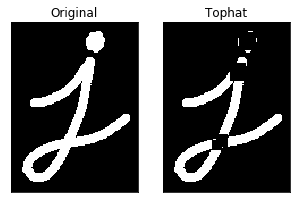

In [49]:
img = cv2.imread('j.png',0)

kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat,cmap='gray'),plt.title('Tophat')
plt.xticks([]), plt.yticks([])
plt.show()

7 黑帽

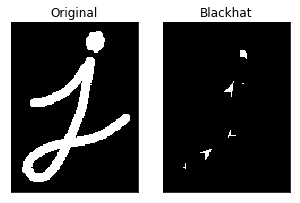

In [52]:
img = cv2.imread('j.png',0)

kernel = np.ones((7,7),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat,cmap='gray'),plt.title('Blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

8 形态学操作之间的关系

In [53]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [54]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [55]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

图像梯度

1 Sobel 算子和 Scharr 算子

In [56]:
#Scharr x方向滤波器
np.array([[-3,0,3],[-10,0,10],[-3,0,3]])

array([[ -3,   0,   3],
       [-10,   0,  10],
       [ -3,   0,   3]])

In [57]:
#Scharr y方向滤波器
np.array([[-3,-10,-3],[0,0,0],[3,10,3]])

array([[ -3, -10,  -3],
       [  0,   0,   0],
       [  3,  10,   3]])

2 Laplacian 算子

In [60]:
#Laplacian 卷积核
np.array([[0,1,0],[1,-4,1],[0,1,0]])

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

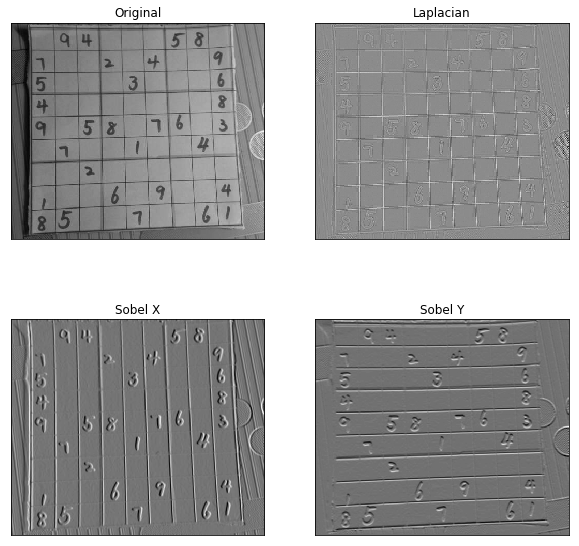

In [65]:
img = cv2.imread('sudokusmall.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

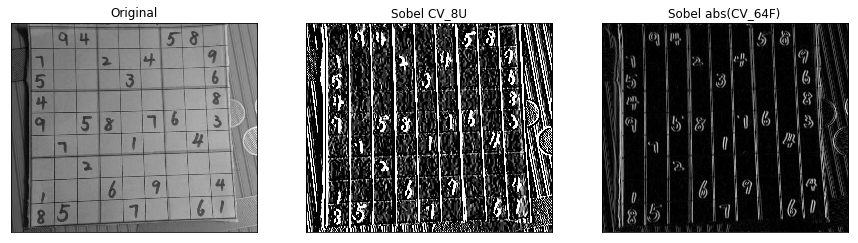

In [72]:
img = cv2.imread('sudokusmall.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(abs_sobel64f,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()